# Tanzania


In [2]:
!pip install -r requirements.txt

  Using cached CFEDemands-0.6.1-py2.py3-none-any.whl (45 kB)
  Using cached gspread-6.1.0-py3-none-any.whl (55 kB)
  Using cached gspread_pandas-3.3.0-py2.py3-none-any.whl (27 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached eep153_tools-0.12.4-py2.py3-none-any.whl (4.9 kB)
  Using cached python_gnupg-0.5.2-py2.py3-none-any.whl (20 kB)
  Using cached ConsumerDemands-0.4.2.dev0-py2.py3-none-any.whl (12 kB)
  Using cached ray-2.11.0-cp39-cp39-manylinux2014_x86_64.whl (65.3 MB)
  Using cached xarray-2024.3.0-py3-none-any.whl (1.1 MB)
  Using cached dvc-3.50.0-py3-none-any.whl (451 kB)
  Using cached StrEnum-0.4.15-py3-none-any.whl (8.9 kB)
  Using cached gspread-5.12.4-py3-none-any.whl (49 kB)
  Using cached dulwich-0.22.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (981 kB)
  Using cached dvc_task-0.4.0-py3-none-any.whl (21 kB)
  Using cached tomlkit-0.12.4-py3-none-any.whl (37 kB)
  Using cached configobj-5.0.8-py2.py3-none-any.whl (36 kB)
 

In [3]:
!pip install CFEDemands
import pandas as pd
import cfe
import cfe.regression as rgsn
import numpy as np
import matplotlib.pyplot as plt

In [15]:
x_tanzania = pd.read_csv("data/Tanzania [Reformatted] - Food Expenditures (2019-20).csv")
x_tanzania = x_tanzania.set_index(['i', 't', 'm'])
x_tanzania.columns.name = 'j'
x_tanzania = x_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))
x_tanzania = x_tanzania.replace(0, np.nan)
x_tanzania

,,j,Cassava Fresh,Chicken,Cooking Oil,Leafy Greens,Millet & Sorghum (flour),Salt,Sugar,Tea (dry),Vegetables (fresh),Beef,...,Cassava Dry/Flour,Yams/Cocoyams,"Butter, Etc.",Milk (dry or canned),Sweets,Seeds,Eggs,Nuts,Other Meat,Rice (paddy)
i,t,m,,,,,,,,,,,,,,,,,,,,,
0001-001-001,2019-20,Mainland Rural,1500.0000,10400.0,875.0,1757.142857,10500.000000,200.0,700.0,120.0,2700.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001-001-003,2019-20,Mainland Rural,1156.2500,NaN,875.0,1415.476190,6000.000000,200.0,NaN,NaN,1882.500000,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001-001-004,2019-20,Dar Es Salaam,NaN,NaN,1800.0,NaN,NaN,200.0,1200.0,200.0,1143.676471,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001-004-001,2019-20,Mainland Rural,NaN,NaN,1050.0,410.000000,7500.000000,250.0,700.0,210.0,1275.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001-004-002,2019-20,Mainland Other Urban,NaN,NaN,1050.0,656.250000,7428.571429,100.0,NaN,NaN,463.636364,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0856-001-001,2019-20,Zanzibar,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,150.0,1866.666667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0856-001-003,2019-20,Zanzibar,2000.0000,NaN,3000.0,NaN,NaN,160.0,2000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0857-001-001,2019-20,Zanzibar,3000.0000,NaN,3000.0,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
z_tanzania = pd.read_csv("data/Tanzania [Reformatted] - Household Characteristics (2019-20).csv")
z_tanzania = z_tanzania.set_index(['i', 't', 'm'])
z_tanzania.columns.name = 'k'
z_tanzania = z_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))
z_tanzania

,,k,M 00-03,F 00-03,M 04-08,F 04-08,M 09-13,F 09-13,M 14-18,F 14-18,M 19-30,F 19-30,M 31-50,F 31-50,M 51+,F 51+,log HSize
i,t,m,,,,,,,,,,,,,,,
0001-001-001,2019-20,Mainland Rural,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.693147
0001-001-003,2019-20,Mainland Rural,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000
0001-001-004,2019-20,Dar Es Salaam,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000
0001-004-001,2019-20,Mainland Rural,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1.098612
0001-004-002,2019-20,Mainland Other Urban,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0856-001-003,2019-20,Zanzibar,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1.945910
0857-001-001,2019-20,Zanzibar,1,1,0,1,0,0,0,0,0,2,2,0,1,0,2.079442
0858-001-001,2019-20,Dar Es Salaam,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1.098612


In [17]:
# p = pd.read_csv("data/new.csv")
# p
# Assuming the 'new.csv' file is related to Tanzania's price data. The original naming wasn't clear.
p_tanzania = pd.read_csv("data/new.csv")

# If the 'm' column is not present, add it
if 'm' not in p_tanzania.columns:
    p_tanzania['m'] = 1

# Setting a multi-level index
p_tanzania = p_tanzania.set_index(['t', 'm'])
p_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
p_tanzania = p_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
p_tanzania = p_tanzania.replace(0, np.nan)
p_tanzania

,j,Beef,Bottled Beer,Bread,"Buns, Cakes And Biscuits","Butter, Etc.",Cassava Dry/Flour,Cassava Fresh,Chicken,Citrus Fruits,Coconuts,...,Sugarcane,Sweet Potatoes,Sweets,Tea (dry),Vegetables (fresh),Vegetables (preserved),Wheat Flour,Wild Birds & Insects,Wine & Spirits,Yams/Cocoyams
t,m,,,,,,,,,,,,,,,,,,,,,
2019-20,Dar Es Salaam,6000,4285.714286,2211.111111,2120.00000,10000,1450,782.342657,9000,1684.210526,1458.333333,...,1000.000000,883.928571,6666.666667,10000.00000,1633.823529,NaN,1300,NaN,6666.666667,1250.000000
2019-20.1,Mainland Other Urban,6000,4000.000000,2222.222222,2500.00000,8250,1000,769.230769,9000,1666.666667,1428.571429,...,585.714286,790.625000,6025.641026,11428.57143,1545.454545,1339.285714,1400,NaN,14666.666670,828.571429
2019-20.2,Mainland Rural,6000,4000.000000,2000.000000,2283.42246,6000,800,625.000000,8000,1291.666667,1250.000000,...,333.333333,666.666667,8333.333333,10000.00000,1500.000000,1000.000000,1400,NaN,NaN,769.230769
2019-20.3,Zanzibar,9000,NaN,2000.000000,2000.00000,4000,1500,1000.000000,7500,1500.000000,1250.000000,...,NaN,1000.000000,15000.000000,10000.00000,1866.666667,NaN,1400,NaN,NaN,1666.666667


In [7]:
fct_tanzania = pd.read_csv("data/Tanzania [Reformatted] - FCT.csv")

# Setting 'j' as the index
fct_tanzania = fct_tanzania.set_index('j')
fct_tanzania.columns.name = 'n'

# Converting all columns to numeric, coercing errors to NaN
fct_tanzania = fct_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))
fct_tanzania

n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
j,,,,,,,,,,,,,,,
Cassava Fresh,1600,14.00,20.0,270,160,381.00,3.00,8.540,0.480,0.870,10,0.00,0.880,206.0,3.00
Chicken,2390,273.00,0.0,50,150,0.00,13.00,84.870,1.680,0.630,480,3.00,4.000,0.0,19.00
Cooking Oil,8840,0.00,0.0,0,0,0.00,0.00,0.000,0.000,0.000,0,0.00,0.000,0.0,0.00
Leafy Greens,22,1.09,0.0,0,40,4.07,0.32,0.375,0.000,0.082,0,0.00,0.071,15.2,0.31
Millet & Sorghum (flour),3740,109.00,90.0,840,80,721.00,30.00,46.680,2.870,4.160,0,0.00,3.800,0.0,17.00
Salt,0,0.00,0.0,0,50,0.00,0.00,0.000,0.000,0.000,0,0.00,0.000,0.0,0.00
Sugar,3870,0.00,0.0,0,10,1000.00,0.00,0.000,0.190,0.000,0,0.00,0.000,0.0,0.00
Tea (dry),1,0.00,0.0,5,0,0.30,0.02,0.000,0.014,0.000,0,0.00,0.000,0.0,0.02
0.01,27,2.85,1.6,116,68,4.07,1.26,0.551,0.194,0.077,283,0.00,0.195,26.5,0.45


In [8]:
rdi = pd.read_csv("data/Uganda - RDI.csv")
rdi = rdi.set_index('n')
rdi.columns.name = 'k'
rdi

k,F 00-03,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
n,,,,,,,,,,,,,,
Energy,1000.0,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
Fiber,14.0,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
Folate,150.0,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
Calcium,700.0,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
Carbohydrate,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
Iron,7.0,7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
Magnesium,80.0,80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,6.0,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


## Nutritonal Adequacy of Diet

In [18]:
# # If the 'm' column is not present, add it and set its values to 1
# if 'm' not in x_tanzania.columns:
#     x_tanzania['m'] = 1

result = cfe.Regression(y=np.log(x_tanzania.stack()), d=z_tanzania)

# Displaying the sorted beta values for Tanzania
result.get_beta().sort_values(ascending=False)

j
Citrus Fruits               1.130966
Ripe Bananas                0.977499
Leafy Greens                0.671702
Plantains                   0.573747
Irish Potatoes              0.569504
Sweet Potatoes              0.560885
Vegetables (fresh)          0.515630
Soft drinks                 0.477239
Buns, Cakes And Biscuits    0.444066
Coconuts                    0.423381
Fish (fresh)                0.417848
Milk (fresh)                0.412032
Cassava Fresh               0.395648
Sugar                       0.394992
Cooking Oil                 0.391770
Macaroni, Spaghetti         0.390850
Wheat Flour                 0.390105
Pulses                      0.378353
Beef                        0.377320
Tea (dry)                   0.374065
Rice (husked)               0.310996
Bread                       0.300077
Chicken                     0.245496
Salt                        0.205973
Fish (dried)                0.188521
Maize (flour)               0.184789
Name: beta, dtype: float64

In [19]:
result.to_pickle('foo_tanzania.pickle')

In [20]:
result = cfe.read_pickle('foo_tanzania.pickle') 
xhat = result.predicted_expenditures()

qhat = (xhat.unstack('j')/p_tanzania).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_tanzania.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_tanzania.loc[use,:]
nutrients.mean() 

z = z_tanzania[rdi.columns.tolist()]

hh_rdi = z@rdi.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_tanzania = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

nutrient_ratio_tanzania

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
i,t,m,,,,,,,,,,,,,,,
0001-001-004,2019-20,Dar Es Salaam,2.552530,2.902643,1.434663,1.546364,0.920107,7.884524,3.290193,2.537535,1.978182,2.505049,0.773387,3.218614,3.742231,1.762289,1.750580
0034-001-001,2019-20,Dar Es Salaam,1.184993,1.299374,0.636021,0.620317,0.282014,3.105873,0.976062,1.010614,0.840581,1.044155,0.360379,1.069863,1.361830,0.516678,0.757219
0042-001-001,2019-20,Dar Es Salaam,1.104204,1.362988,0.557508,0.529565,0.260044,2.658900,0.664128,0.994753,0.729059,0.889846,0.266543,1.120951,1.314766,0.573318,0.817864
0051-001-002,2019-20,Dar Es Salaam,1.360813,1.465849,0.665924,0.735789,0.424101,4.086091,1.569122,1.227464,0.942892,1.198431,0.291952,1.593039,1.664637,0.647833,0.865118
0051-001-003,2019-20,Dar Es Salaam,1.929961,2.227054,1.097113,0.947834,0.526130,4.722113,1.040701,1.707394,1.415201,1.586332,0.670759,2.020219,2.673769,1.465236,1.402158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0686-001-001,2019-20,Dar Es Salaam,2.086514,2.499240,1.038065,0.902201,0.448014,4.219678,1.115922,1.696829,1.320873,1.519133,0.565476,2.141827,2.497883,1.171721,1.565566
0701-003-001,2019-20,Dar Es Salaam,1.628523,1.972202,0.809282,0.781307,0.358233,3.385149,0.905769,1.413226,1.105201,1.313691,0.437491,1.629714,1.937080,0.830561,1.145464
0809-001-008,2019-20,Dar Es Salaam,2.378187,2.654472,1.359475,1.242819,0.745503,6.821273,1.611130,2.219006,1.782360,2.093420,0.778123,2.633638,3.359232,1.770262,1.674161


## Estimate Demand System

In [49]:
# from cfe import Regression
# from cfe.estimation import drop_columns_wo_covariance
# def output_as_pickle(expenditure_data, household_data, path):
#     x = pd.read_csv(expenditure_data)
#     d = pd.read_csv(household_data)
#     x.columns.name = 'j'
#     d.columns.name = 'k'
#     x = x.groupby('j',axis=1).sum()
#     x = x.replace(0,np.nan)
#     y = np.log(x.set_index(['i','t','m']))
#     d.set_index(['i','t','m'],inplace=True)
#     y = drop_columns_wo_covariance(y,min_obs=30)
#     use = y.index.intersection(d.index)
#     y = y.loc[use,:]
#     d = d.loc[use,:]
#     y = y.stack()
#     d = d.stack()
#     assert y.index.names == ['i','t','m','j']
#     assert d.index.names == ['i','t','m','k']
#     result = Regression(y=y,d=d)
#     result.predicted_expenditures()
#     result.to_pickle(path)

In [30]:
# tanzania_path_hh_characteristics = "data/Tanzania [Reformatted] - Household Characteristics (2019-20).csv"
# tanzania_path_expenditure = "data/Tanzania [Reformatted] - Food Expenditures (2019-20).csv"

In [32]:
# output_as_pickle(tanzania_path_expenditure, tanzania_path_hh_characteristics, "tanzania.pickle")

/tmp/ipykernel_146/998574362.py:8: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  x = x.groupby('j',axis=1).sum()


In [12]:
result_tanzania = cfe.regression.read_pickle("foo_tanzania.pickle")

Text(0.5, 1.0, 'Tanzania Elasticity by Food, sorted')

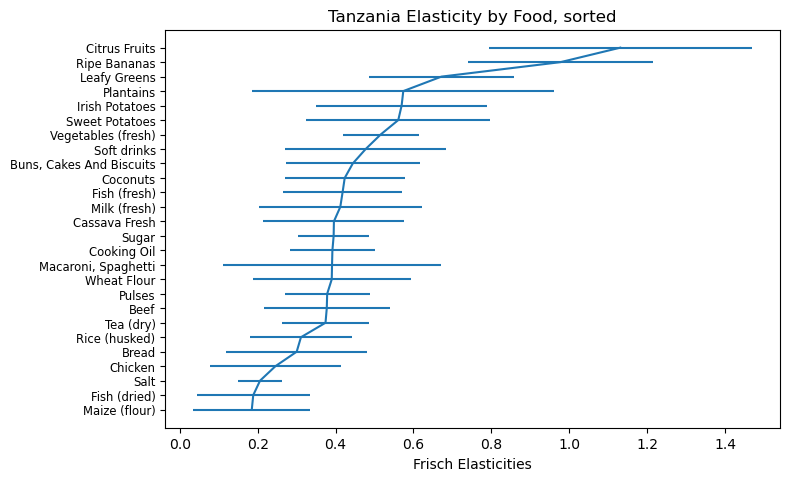

In [13]:
result_tanzania.graph_beta()
plt.title("Tanzania Elasticity by Food, sorted")

In [14]:
result_tanzania.get_gamma()

k,M 00-03,F 00-03,M 04-08,F 04-08,M 09-13,F 09-13,M 14-18,F 14-18,M 19-30,F 19-30,M 31-50,F 31-50,M 51+,F 51+,log HSize,Constant
j,,,,,,,,,,,,,,,,
Beef,0.057889,-0.002642,0.130081,-0.030027,-0.190984,-0.085873,0.062322,0.064395,0.027185,0.018142,0.118226,0.150355,0.193557,0.103374,0.218583,8.765711
Bread,-0.216731,0.013294,-0.081903,0.188860,0.133395,0.157813,-0.208135,-0.031618,-0.016442,-0.018433,0.206704,-0.058163,0.245989,0.264208,0.102469,7.636376
"Buns, Cakes And Biscuits",-0.095275,-0.152395,-0.099655,-0.151606,0.101430,0.008435,0.044279,0.081443,-0.078121,-0.095017,-0.047911,-0.077995,-0.036018,-0.067753,0.627801,7.424461
Cassava Fresh,-0.033384,0.001466,-0.119424,-0.074521,0.099864,0.140275,-0.001128,-0.108641,0.010591,-0.014151,-0.054154,-0.042730,-0.000629,0.239447,0.468088,7.461882
Chicken,-0.047185,-0.153774,0.161374,0.104910,0.000649,-0.004481,-0.190906,-0.031950,-0.174711,-0.017650,-0.198964,0.002456,-0.104200,0.059834,0.540483,9.037218
Citrus Fruits,-0.214864,-0.029425,-0.401002,-0.064460,0.009824,-0.103253,-0.003060,-0.084038,-0.076891,-0.058235,-0.155576,-0.029758,-0.297496,0.147079,0.630790,6.871653
Coconuts,-0.071128,-0.021377,-0.007746,-0.069522,-0.024108,0.118142,-0.066862,-0.002895,0.001322,0.010893,-0.044446,-0.047646,0.225628,0.138669,0.367485,7.794761
Cooking Oil,-0.057656,0.007522,-0.149548,-0.099254,-0.055286,0.018071,0.067515,-0.004515,0.037113,0.152724,0.175469,0.192823,-0.031507,0.041400,0.248826,7.337196
Fish (dried),-0.144453,-0.041622,-0.077762,-0.034647,0.015654,0.017076,0.190645,0.000366,0.041801,0.079326,0.098826,-0.009236,0.071834,0.049411,0.247289,7.647585


In [51]:
# %matplotlib inline
# df = pd.DataFrame({'y':p_tanzania,'yhat':result.get_predicted_log_expenditures()})
# df.plot.scatter(x='yhat',y='y')

## Welfare

<Axes: ylabel='Density'>

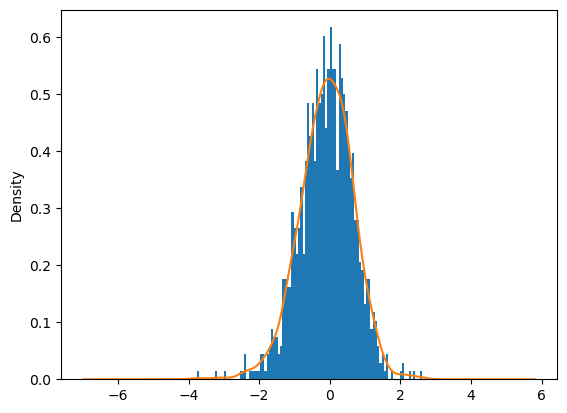

In [17]:
ax = result.get_w().plot.hist(bins=100,density=True)
result.get_w().plot.kde(ax=ax)

#### budget

In [21]:
xhat = result.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

#### Reference Price

In [22]:
# Reference prices chosen from a particular time; average across place.
# These are prices per kilogram:
pbar = p_tanzania.mean()
pbar = pbar[result.beta.index] # Only use prices for goods we can estimate

#Finally, define a function to change a single price in the vector $p$:
def my_prices(p0,p=pbar,j='Millet'):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

#### Food Quantity

In [23]:
qhat = (xhat.unstack('j')/pbar).dropna(how='all')

# Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

qhat

,,j,Beef,Bread,"Buns, Cakes And Biscuits",Cassava Fresh,Chicken,Citrus Fruits,Coconuts,Cooking Oil,Fish (dried),Fish (fresh),...,Pulses,Rice (husked),Ripe Bananas,Salt,Soft drinks,Sugar,Sweet Potatoes,Tea (dry),Vegetables (fresh),Wheat Flour
i,t,m,,,,,,,,,,,,,,,,,,,,,
0001-001-001,2019-20,Mainland Rural,0.914945,1.207514,0.767999,2.572115,0.937665,0.831351,2.061211,0.368804,0.400443,0.651225,...,1.332975,2.727012,0.758395,0.226440,1.361302,0.606779,2.939665,0.024705,1.096825,1.221841
0001-001-003,2019-20,Mainland Rural,0.715628,0.888035,0.580537,1.515767,0.583560,0.688131,1.167261,0.399862,0.344113,0.557966,...,0.836231,1.725276,0.365908,0.195219,1.170131,0.488086,1.838499,0.023209,1.119447,0.865614
0001-001-004,2019-20,Dar Es Salaam,0.958772,1.295640,0.709292,1.822287,0.608981,1.132585,1.288949,0.473186,0.338025,0.809117,...,0.951460,1.789348,0.629688,0.202974,1.524734,0.463614,1.790150,0.028091,1.750422,0.895191
0001-004-001,2019-20,Mainland Rural,0.723516,0.530040,0.721339,2.060212,0.882717,0.596228,1.354735,0.402955,0.359060,0.583208,...,1.094104,2.417180,0.653635,0.226822,1.228847,0.582553,2.052428,0.026627,0.951699,1.313641
0001-004-002,2019-20,Mainland Other Urban,0.479057,0.542877,0.334850,0.808930,0.566891,0.173473,0.697830,0.224038,0.274342,0.316159,...,0.421026,1.001932,0.092298,0.145324,0.507344,0.233584,0.723782,0.014838,0.707770,0.443366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0856-001-001,2019-20,Zanzibar,1.848119,2.289162,1.649520,11.219252,0.828899,0.999660,6.490491,1.378268,0.522683,2.463060,...,1.823820,11.135899,3.182357,0.323135,2.655715,1.626491,4.905900,0.042368,2.082573,4.478569
0856-001-003,2019-20,Zanzibar,0.806592,1.959280,0.846741,4.260088,0.873768,0.312757,2.354006,0.657076,0.238607,1.424802,...,0.920237,5.462608,0.786336,0.194894,0.813562,0.721938,2.176280,0.022279,0.849058,1.535732
0857-001-001,2019-20,Zanzibar,1.107916,1.972412,0.794032,2.822912,0.634653,0.181636,2.255351,0.839764,0.292729,1.983191,...,0.813513,8.020549,0.711754,0.184940,1.293921,0.811423,2.147450,0.019919,1.144685,2.057327


### Demand Curve ()

In [37]:
use = 'Beef'  # Good we want demand curve for

# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

plt.plot([result.demands(xref,my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)
plt.plot([result.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)
plt.plot([result.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

IndexError: index 26 is out of bounds for axis 0 with size 26

### Engel Curves

Text(0.5, 1.0, 'Engel Curves')

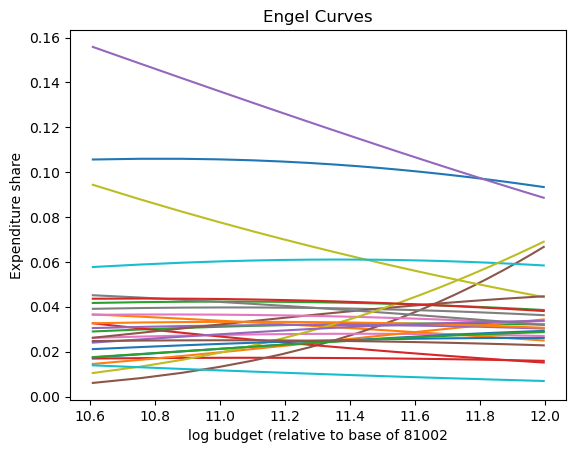

In [58]:
fig,ax = plt.subplots()

ax.plot(np.log(scale*xref),[result.expenditures(s*xref,pbar)/(s*xref) for s in scale])
ax.set_xlabel(f'log budget (relative to base of {xref:.0f}')
ax.set_ylabel(f'Expenditure share')
ax.set_title('Engel Curves')

### Indirect Utility

Text(0.5, 1.0, 'Indirect Utility Function')

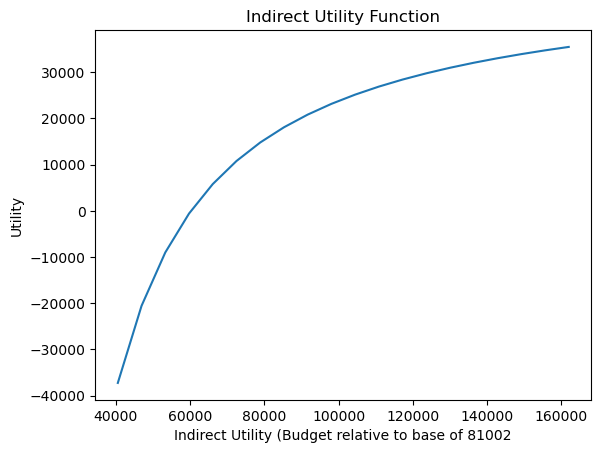

In [59]:
fig,ax = plt.subplots()

ax.plot(scale*xref,[result.indirect_utility(s*xref,pbar) for s in scale])
ax.set_xlabel(f'Indirect Utility (Budget relative to base of {xref:.0f}')
ax.set_ylabel(f'Utility')
ax.set_title('Indirect Utility Function')

## Nutrition demand

In [29]:
# Create a new FCT and vector of consumption that only share rows in common:
fct0,c0 = fct_tanzania.align(qhat.T,axis=0,join='inner')
print(fct0.index)

Index(['Cassava Fresh', 'Chicken', 'Cooking Oil', 'Leafy Greens', 'Salt',
       'Sugar', 'Tea (dry)', 'Beef', 'Fish (dried)', 'Maize (flour)', 'Pulses',
       'Buns, Cakes And Biscuits', 'Fish (fresh)', 'Milk (fresh)', 'Plantains',
       'Rice (husked)', 'Soft drinks', 'Sweet Potatoes', 'Coconuts',
       'Irish Potatoes', 'Wheat Flour', 'Bread', 'Citrus Fruits',
       'Ripe Bananas'],
      dtype='object', name='j')


In [30]:
# The @ operator means matrix multiply
N = fct0.T@c0

N  #NB: Uganda quantities are for previous 7 days

i,0001-001-001,0001-001-003,0001-001-004,0001-004-001,0001-004-002,0003-001-001,0004-001-001,0005-001-001,0007-001-001,0009-001-001,...,0851-001-001,0852-001-001,0852-001-002,0854-001-001,0855-001-001,0856-001-001,0856-001-003,0857-001-001,0858-001-001,0858-001-002
t,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,...,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20
m,Mainland Rural,Mainland Rural,Dar Es Salaam,Mainland Rural,Mainland Other Urban,Mainland Rural,Mainland Rural,Mainland Rural,Mainland Rural,Mainland Rural,...,Zanzibar,Zanzibar,Zanzibar,Zanzibar,Zanzibar,Zanzibar,Zanzibar,Zanzibar,Dar Es Salaam,Dar Es Salaam
n,,,,,,,,,,,,,,,,,,,,,
Energy,63959.812344,41367.882997,43991.296267,55821.184350,23338.320704,131842.867518,78934.892972,88856.550811,107129.760801,74368.531597,...,84419.862973,73418.677539,77442.897972,123476.907087,72092.574361,149809.102230,70928.485947,81953.514772,37402.220229,205145.512624
Protein,1647.712471,1077.096122,1208.821082,1421.829931,679.252043,3165.482255,2047.105536,2168.714576,2699.564620,1774.624465,...,2198.277584,1866.979039,1948.902913,3090.760967,1717.035804,3400.803958,1788.528125,2098.078558,1039.576614,5302.871023
Fiber,545.909698,328.404949,341.167608,453.583064,164.140290,1111.042845,597.988599,681.490433,933.730314,625.283182,...,483.586077,446.651993,424.606552,883.033571,370.424459,1040.376621,441.268875,410.716274,218.879759,1323.996805
Folate,5953.268569,3798.900531,4416.654207,4586.871162,2073.105939,11274.055068,6570.116166,6983.363721,9283.827530,6252.449107,...,7124.261309,6163.284343,6619.023728,11179.689047,5701.736893,12612.209025,6411.167011,6325.907243,3074.465975,17643.469335
Calcium,8382.863572,5583.853920,6971.697175,5965.669390,3025.693767,15797.575308,8736.083683,7737.971158,10839.850453,6956.808021,...,11004.167908,9026.309380,9817.070641,16874.374435,7368.455278,17172.829833,9466.659823,10741.607456,4658.736051,24020.303003
Carbohydrate,11666.509508,7144.684873,7284.740758,10096.793405,3839.235360,24583.649037,14384.484488,16880.337576,19870.966041,14155.828334,...,13821.919985,13091.272950,13037.972762,21905.318101,13273.755479,27327.643876,12527.769823,14269.677532,6296.738156,37211.387504
Iron,245.237627,161.961286,186.440322,194.882070,92.581320,465.833419,281.413446,300.206272,382.377968,253.562979,...,302.376328,263.707222,277.071044,453.319431,239.374572,490.967209,258.856167,281.487552,138.461534,734.702312


In [33]:
def nutrient_demand(x,p):
    c = r.demands(x,p)
    fct0,c0 = fct_tanzania.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

In [27]:
r = rgsn.read_pickle('tanzania.pickle')

Text(0, 0.5, 'log nutrient')

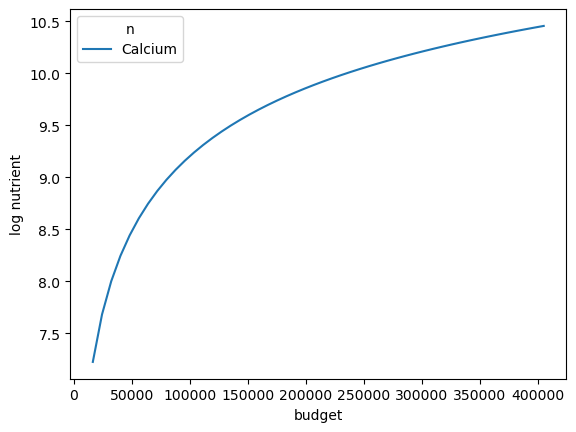

In [43]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(xref/5,xref*5,50)

# UseNutrients = ['Protein','Energy','Iron','Calcium','Vitamin C']
UseNutrients = ['Calcium']

df = pd.concat({myx:np.log(nutrient_demand(myx,pbar))[UseNutrients] for myx in X},axis=1).T
ax = df.plot()

ax.set_xlabel('budget')
ax.set_ylabel('log nutrient')

### Now how does nutrition vary with prices?

Text(0, 0.5, 'log nutrient')

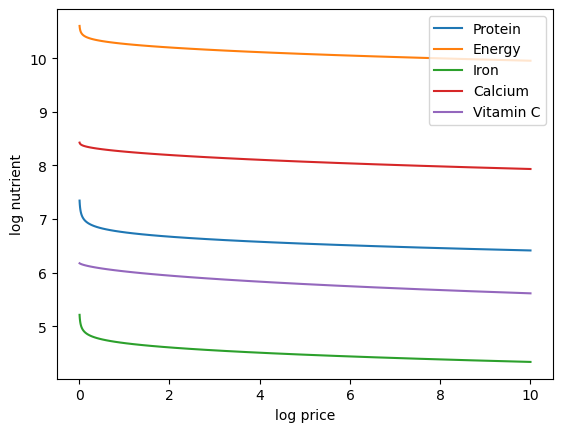

In [79]:
USE_GOOD = 'Beef'

scale = np.geomspace(.01,10,50)

ndf = pd.DataFrame({s:np.log(nutrient_demand(xref/2,my_prices(pbar[USE_GOOD]*s,j=USE_GOOD)))[UseNutrients] for s in scale}).T

ax = ndf.plot()

ax.set_xlabel('log price')
ax.set_ylabel('log nutrient')

### Nutritional Needs of Households


In [80]:
# In first round, averaged over households and villages
dbar = r.d[rdi.columns].mean()

In [81]:
# This matrix product gives minimum nutrient requirements for
# the average household
hh_rdi = rdi@dbar

hh_rdi

n
Energy           8559.346642
Protein           191.028131
Fiber             119.830853
Folate           1600.635209
Calcium          5079.945554
Carbohydrate      638.911071
Iron               53.005445
Magnesium        1362.295826
Niacin             60.834846
Phosphorus       3702.713249
Potassium       21205.898367
Riboflavin          4.790381
Thiamin             4.651906
Vitamin A        3180.217786
Vitamin B-12        9.603811
Vitamin B-6         5.321869
Vitamin C         291.084392
Vitamin E          59.785844
Vitamin K         387.999093
Zinc               38.223230
dtype: float64

In [42]:
p_tanzania['Fish (dried)']

t          m                   
2019-20    Dar Es Salaam           6000
2019-20.1  Mainland Other Urban    5000
2019-20.2  Mainland Rural          5000
2019-20.3  Zanzibar                7000
Name: Fish (dried), dtype: int64